# TP 1 - Hybrid Systems

In [1]:
import numpy as np
import control as cp
import matplotlib.pyplot as pt
from control.matlab import * 

In [2]:
# System Parameters

ks = 0.065

a1 = 0.01
a2 = 0.01
b1 = 0.005
b2 = 0.005
h1 = 2
h2 = 0

In [3]:
# State-space matrices for mode t1 (ON1 ∧ OFF2)

A = np.array([[-a1, b1],
              [b2, -a2]])

B = np.array([
    [h1, 0],
    [0,  h2]
])

C = np.eye(2)
D = np.zeros((2, 2))

x0 = np.array([20, 20])

In [ ]:
HeatedRoom = ss(A, B, C, D)
Thermostat = tf(ks, [1])

OpenLoop = series(Thermostat, HeatedRoom)

OpenLoop_Room1 = OpenLoop[0, 0]
ClosedLoop = feedback(OpenLoop_Room1, 1)

# Simulate step response
# For open-loop: use initial_response or lsim
t = np.linspace(0, 500, 1000)
u = np.ones((len(t), 2))  # Step input for both tanks

# Simulate without X0
y_both, t_both = step(OpenLoop)

# Simulate with X0
#y_both, t_both, x_out = lsim(OpenLoop, u, t, X0=x0)

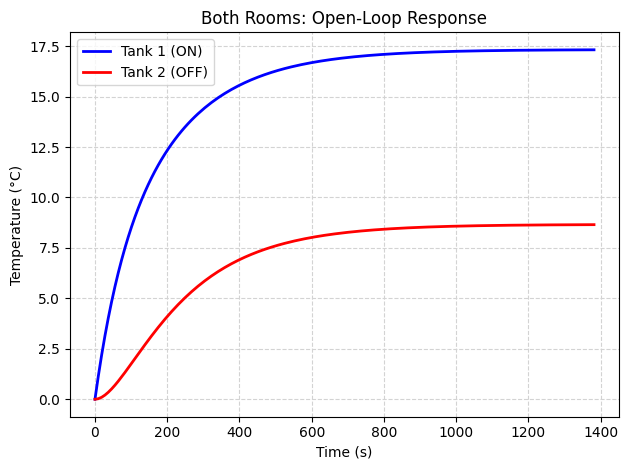

In [5]:
pt.plot(t_both, y_both[:, 0], linewidth=2.0, color='blue', label='Tank 1 (ON)')
pt.plot(t_both, y_both[:, 1], linewidth=2.0, color='red', label='Tank 2 (OFF)')
pt.grid(color='lightgray', linestyle='--')
pt.ylabel(r'Temperature (°C)')
pt.xlabel('Time (s)')
pt.title('Both Rooms: Open-Loop Response')
pt.legend()

pt.tight_layout()
pt.show()